##📌 Important Points
✔ Label Encoding assigns numbers alphabetically:

Blue = 0

Green = 1

Red = 2

✔ Use Label Encoding when:

Categories are not many

Algorithms require numerical input (XGBoost, Random Forest, LightGBM can handle it)

❌ Not recommended when:

There is no natural order

Encoding may create false ordinal relationship

For such cases → use One Hot Encoding

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample dataset
data = {
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red'],
    'Size': ['S', 'M', 'L', 'M', 'L'],
    'Price': [100, 150, 130, 120, 160]
}

df = pd.DataFrame(data)
print("Original Dataset:\n", df)

# Label Encoder object
le = LabelEncoder()

# Encoding Color column
df['Color_encoded'] = le.fit_transform(df['Color'])

# Encoding Size column
df['Size_encoded'] = le.fit_transform(df['Size'])   # S, M, L → 2,1,0 (alphabetical)

print("\nEncoded Dataset:\n", df)


Original Dataset:
    Color Size  Price
0    Red    S    100
1   Blue    M    150
2  Green    L    130
3   Blue    M    120
4    Red    L    160

Encoded Dataset:
    Color Size  Price  Color_encoded  Size_encoded
0    Red    S    100              2             2
1   Blue    M    150              0             1
2  Green    L    130              1             0
3   Blue    M    120              0             1
4    Red    L    160              2             0


In [1]:
import pandas as pd

# Sample dataset
data = {
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red'],
    'Size': ['S', 'M', 'L', 'M', 'L'],
    'Price': [100, 150, 130, 120, 160]
}

df = pd.DataFrame(data)
print("Original Data:\n", df)

# One Hot Encoding using pandas
df_encoded = pd.get_dummies(df, columns=['Color', 'Size'], drop_first=False)

print("\nOne Hot Encoded Data:\n", df_encoded)


Original Data:
    Color Size  Price
0    Red    S    100
1   Blue    M    150
2  Green    L    130
3   Blue    M    120
4    Red    L    160

One Hot Encoded Data:
    Price  Color_Blue  Color_Green  Color_Red  Size_L  Size_M  Size_S
0    100       False        False       True   False   False    True
1    150        True        False      False   False    True   False
2    130       False         True      False    True   False   False
3    120        True        False      False   False    True   False
4    160       False        False       True    True   False   False


In [7]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(sparse_output=False)   # FIXED

encoded = encoder.fit_transform(df[['Color', 'Size']])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Color', 'Size']))

final_df = pd.concat([df, encoded_df], axis=1)
print(final_df)



   Color Size  Price  Color_Blue  Color_Green  Color_Red  Size_L  Size_M  \
0    Red    S    100         0.0          0.0        1.0     0.0     0.0   
1   Blue    M    150         1.0          0.0        0.0     0.0     1.0   
2  Green    L    130         0.0          1.0        0.0     1.0     0.0   
3   Blue    M    120         1.0          0.0        0.0     0.0     1.0   
4    Red    L    160         0.0          0.0        1.0     1.0     0.0   

   Size_S  
0     1.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


##✅ What is Feature Scaling?

Feature Scaling means transforming all numerical features to the same scale.

Why?
Because many ML algorithms work better when all features have similar ranges.

🎯 Why Feature Scaling is Important

Some algorithms calculate distance or use gradient descent:

Algorithms that NEED scaling:

Logistic Regression

Linear Regression

KNN

SVM

K-means

Neural Networks

PCA

Algorithms that DO NOT need scaling:

Decision Tree

Random Forest

XGBoost

✨ Two Most Common Scaling Methods
1️⃣ Standardization (Z-score Normalization)

Formula:

𝑋
𝑠
𝑐
𝑎
𝑙
𝑒
𝑑
=
𝑋
−
mean
std
X
scaled
	​

=
std
X−mean
	​


Values become: mean = 0, std = 1

👉 Use when data has outliers.

2️⃣ Min-Max Scaling (Normalization)

Formula:

𝑋
𝑠
𝑐
𝑎
𝑙
𝑒
𝑑
=
𝑋
−
𝑋
𝑚
𝑖
𝑛
𝑋
𝑚
𝑎
𝑥
−
𝑋
𝑚
𝑖
𝑛
X
scaled
	​

=
X
max
	​

−X
min
	​

X−X
min
	​

	​


Values become: 0 → 1

👉 Use when you want data in a fixed range (0–1).

In [8]:
import pandas as pd

data = {
    'Age': [20, 22, 25, 30, 35],
    'Salary': [30000, 35000, 40000, 50000, 60000]
}

df = pd.DataFrame(data)
print(df)


   Age  Salary
0   20   30000
1   22   35000
2   25   40000
3   30   50000
4   35   60000


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print("\nStandard Scaled Data:\n", scaled_df)



Standard Scaled Data:
         Age    Salary
0 -1.171603 -1.207020
1 -0.805477 -0.742781
2 -0.256288 -0.278543
3  0.659027  0.649934
4  1.574342  1.578410


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print("\nMin-Max Scaled Data:\n", scaled_df)



Min-Max Scaled Data:
         Age    Salary
0  0.000000  0.000000
1  0.133333  0.166667
2  0.333333  0.333333
3  0.666667  0.666667
4  1.000000  1.000000


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Sample Dataset
data = {
    'Age': [22, 25, 47, 52, 46, 56],
    'Salary': [25000, 40000, 45000, 50000, 60000, 52000],
    'Purchased': [0, 0, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

# Features & Target
X = df[['Age', 'Salary']]
y = df['Purchased']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
model = DecisionTreeClassifier(criterion='gini', max_depth=3)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.0


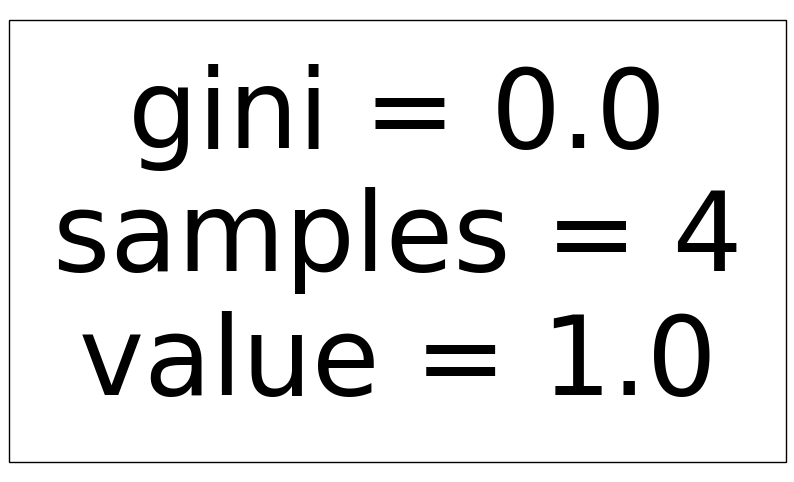

In [3]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(model, feature_names=['Age', 'Salary'], filled=True)
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Training Data
X = [
    [7, 2],
    [8, 3],
    [9, 8],
    [10, 9]
]---
y = [0, 0, 1, 1]

# Create model
model = DecisionTreeClassifier()

# Train model
model.fit(X, y)

# User input
size = float(input("Enter the fruit size (m): "))
shade = float(input("Enter the fruit shade (1 to 10): "))

# Prediction
result = model.predict([[size, shade]])[0]

# Output
if result == 1:
    print("Fruit is: GOOD")
else:
    print("Fruit is: BAD")


Fruit is: BAD


In [10]:
from sklearn.tree import DecisionTreeClassifier

# Training dataset
# Features: [size, shade]
X = [
    [7, 2],
    [8, 3],
    [9, 8],
    [10, 9]
]

# Target labels: 0 = Apple, 1 = Mango
y = [0, 0, 1, 1]

# Create model
model = DecisionTreeClassifier()

# Train the model
model.fit(X, y)

# Take input from user
size = float(input("Enter fruit size (in cm): "))
shade = float(input("Enter shade value (1–10): "))

# Make prediction
result = model.predict([[size, shade]])[0]

# Print result
if result == 0:
    print("Prediction: Apple")
else:
    print("Prediction: Mango")


Prediction: Mango


In [11]:
from sklearn.tree import DecisionTreeClassifier

# Features: [weather, wind]
# weather: 0 = Sunny, 1 = Rainy
# wind: 0 = Weak, 1 = Strong
X = [
    [0, 0],   # Sunny, Weak
    [0, 1],   # Sunny, Strong
    [1, 0],   # Rainy, Weak
    [1, 1]    # Rainy, Strong
]

# Target: 1 = Play, 0 = Not Play
y = [1, 0, 1, 0]

# Create model
model = DecisionTreeClassifier()
model.fit(X, y)

# User input
weather = int(input("Weather (0=Sunny, 1=Rainy): "))
wind = int(input("Wind (0=Weak, 1=Strong): "))

result = model.predict([[weather, wind]])[0]

if result == 1:
    print("Decision: You can play outside!")
else:
    print("Decision: Do NOT play outside.")


Decision: Do NOT play outside.


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


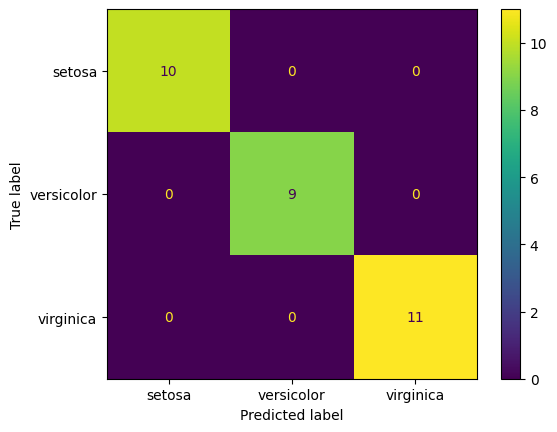

In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 1. Load dataset
data = load_iris()
X = data.data
y = data.target

# 2. Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)

# 4. Predict
y_pred = model.predict(X_test)

# 5. Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 6. Plot the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot()

plt.show()


Confusion Matrix:
 [[39 12]
 [ 5 44]]


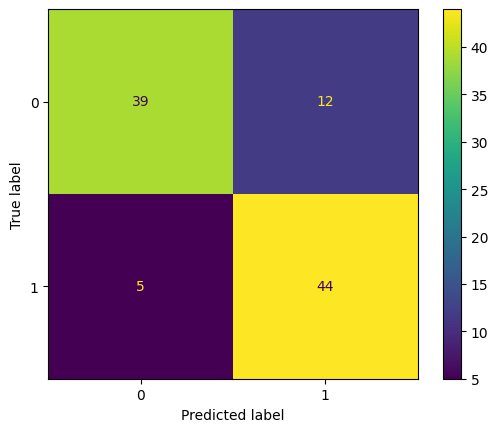

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Create a binary classification dataset
X, y = make_classification(
    n_samples=500,
    n_features=5,
    n_classes=2,
    n_informative=3,
    random_state=42
)

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Predict
y_pred = model.predict(X_test)

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 6. Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


Confusion Matrix:
 [[2 0]
 [0 1]]


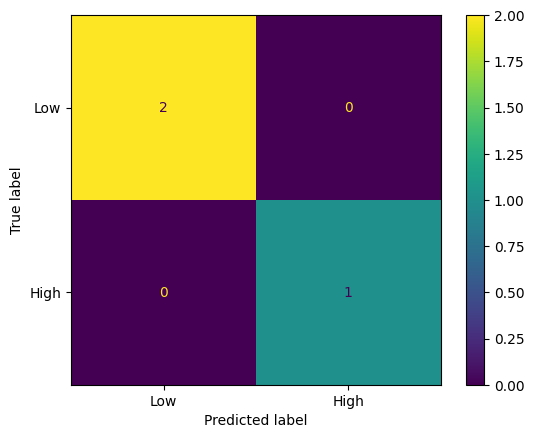

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# 1. Create your own dataset
# ---------------------------
# Features: [Age, Salary]
X = np.array([
    [22, 20000],
    [25, 22000],
    [47, 50000],
    [52, 52000],
    [46, 49500],
    [56, 60000],
    [23, 21000],
    [24, 23000]
])

# Labels (0 = Low Income, 1 = High Income)
y = np.array([0, 0, 1, 1, 1, 1, 0, 0])

# ---------------------------
# 2. Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ---------------------------
# 3. Train model
# ---------------------------
model = LogisticRegression()
model.fit(X_train, y_train)

# ---------------------------
# 4. Make predictions
# ---------------------------
y_pred = model.predict(X_test)

# ---------------------------
# 5. Confusion matrix
# ---------------------------
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ---------------------------
# 6. Plot confusion matrix
# ---------------------------
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "High"])
disp.plot()

plt.show()



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Load CSV file
df = pd.read_csv("sample.csv")

# 2. Split features (X) and target (y)
X = df[['Experience']]      # independent variable
y = df['Salary']            # dependent variable

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# random_state=42 → keeps data split same every time

# 4. Train model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predict on test data
y_pred = model.predict(X_test)

# 6. Predict new value
experience = float(input("Enter experience in years: "))
pred_salary = model.predict([[experience]])

print("Predicted Salary:", pred_salary[0])


Predicted Salary: 50000.0


c:\Users\garg2\OneDrive\one drive\OneDrive\Desktop\ALML\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np

# Generate big synthetic dataset (10,000 rows)
np.random.seed(42)
rows = 10000

data = {
    "Area": np.random.randint(500, 5000, rows),
    "Bedrooms": np.random.randint(1, 6, rows),
    "Bathrooms": np.random.randint(1, 5, rows),
}

# Price = base + area*value + bedrooms*value + bathrooms*value + noise
data["Price"] = (
    data["Area"] * 150
    + data["Bedrooms"] * 50000
    + data["Bathrooms"] * 40000
    + np.random.randint(-50000, 50000, rows)
)
# Price =
#     (Area × 150)
#   + (Bedrooms × 50,000)
#   + (Bathrooms × 40,000)
#   + Random noise (−50k to +50k)


df = pd.DataFrame(data)

file_path = "C:/Users/garg2/OneDrive/one drive/OneDrive/Desktop/ALML/dataset.csv"
df.to_csv(file_path, index=False)

file_path


'C:/Users/garg2/OneDrive/one drive/OneDrive/Desktop/ALML/dataset.csv'

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# -------------------------------
# 1. Load CSV File
# -------------------------------
df = pd.read_csv("dataset.csv")   # Replace with your dataset name
print("Dataset Loaded Successfully!")
print(df.head())

# -------------------------------
# 2. Select Features (X) and Target (y)
# -------------------------------
X = df[['Area', 'Bedrooms', 'Bathrooms']]
y = df['Price']

# -------------------------------
# 3. Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        
    random_state=42       
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

# -------------------------------
# 4. Train Linear Regression Model
# -------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -------------------------------
# 5. Predict on Test Data
# -------------------------------
predictions = model.predict(X_test)
print("\nPredictions:")
print(predictions[:10])

# -------------------------------
# 6. User Input Prediction
# -------------------------------
print("\n--- Predict Your Own House Price ---")
area = float(input("Enter Area (sqft): "))
bedrooms = int(input("Enter Bedrooms: "))
bathrooms = int(input("Enter Bathrooms: "))

user_data = [[area, bedrooms, bathrooms]]

predicted_price = model.predict(user_data)[0]

print("\nPredicted Price:", predicted_price)
print("Predicted Price:", int(predicted_price))


Dataset Loaded Successfully!
   Area  Bedrooms  Bathrooms   Price
0  1360         5          3  620479
1  4272         2          1  824370
2  3592         3          3  846487
3   966         1          3  328096
4  4926         2          3  941300
Train size: 8000
Test size: 2000

Predictions:
[292237.9546713  656682.50898297 739584.36171945 954671.77731148
 674153.88711498 935484.43216393 533571.12001469 534411.13261713
 523242.12776538 870556.529509  ]

--- Predict Your Own House Price ---



Predicted Price: 460353.4467845998
Predicted Price: 460353


c:\Users\garg2\OneDrive\one drive\OneDrive\Desktop\ALML\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# 4. Predictions
y_pred = model.predict(X_test)

# 5. Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465
F1 Score: 0.9655172413793104


c:\Users\garg2\OneDrive\one drive\OneDrive\Desktop\ALML\venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Load CSV
df = pd.read_csv("students.csv")

# 2. Split into X (features) and y (target)
X = df[['Hours_Studied', 'Attendance']]
y = df['Pass']

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 4. Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Predict
y_pred = model.predict(X_test)

# 6. Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# 7. Test with manual input
hours = float(input("Enter hours studied: "))
attendance = float(input("Enter attendance: "))
result = model.predict([[hours, attendance]])[0]

print("Pass" if result == 1 else "Fail")


Accuracy: 1.0
Fail


c:\Users\garg2\OneDrive\one drive\OneDrive\Desktop\ALML\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Load CSV
df = pd.read_csv("bank_churn.csv")

# 2. Features (X) and Target (y)
X = df[['Age', 'Salary', 'Balance']]
y = df['Churn']

# 3. Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Predict
y_pred = model.predict(X_test)

# 6. Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# 7. Manual prediction
age = float(input("Enter Age: "))
salary = float(input("Enter Salary: "))
balance = float(input("Enter Balance: "))

result = model.predict([[age, salary, balance]])[0]

print("Customer will CHURN" if result == 1 else "Customer will STAY")


Accuracy: 1.0
Customer will CHURN


c:\Users\garg2\OneDrive\one drive\OneDrive\Desktop\ALML\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

# 1. Load CSV
df = pd.read_csv("emails.csv")

# 2. Split X and y
X = df['Email']
y = df['Spam']

# 3. Convert text to features
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.25, random_state=42
)

# 5. Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 6. Predict
y_pred = model.predict(X_test)

# 7. Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# 8. Manual input prediction
email = input("Enter email text: ")
email_vec = vectorizer.transform([email])

result = model.predict(email_vec)[0]

print("SPAM" if result == 1 else "NOT SPAM")


Accuracy: 0.6666666666666666
SPAM


In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Custom dataset
y_true = [1,0,1,1,0,1,0,1,1,0]
y_pred = [1,1,0,1,0,1,0,1,1,0]

# Metrics
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))


Accuracy: 0.8
Precision: 0.8333333333333334
Recall: 0.8333333333333334
F1 Score: 0.8333333333333334


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load CSV file
df = pd.read_csv("dataset_1.csv")

# 2. Separate features and label
X = df.drop("Label", axis=1)
y = df["Label"]

# 3. Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create SVM model
model = SVC(kernel='linear')   # kernel = linear, rbf, poly

# 5. Train the model
model.fit(X_train, y_train)

# 6. Predict
y_pred = model.predict(X_test)

# 7. Check accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# 8. Predict for new input
print("Prediction:", model.predict([[5.8, 3.1, 4.2]]))


Accuracy: 1.0
Prediction: [2]


c:\Users\garg2\OneDrive\one drive\OneDrive\Desktop\ALML\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


##SVM (Support Vector Machine) machine learning me ek powerful classification algorithm hai.
Simple language me:

✅ SVM hota kya hai? (Easy Explanation)

SVM ek line, curve, ya boundary banata hai jo do ya zyada classes ko separate karti hai.

Example:

Apple (0)

Orange (1)

SVM ek best line find karega jo in dono classes ko alag kar de.

That line is called:

➡️ Decision Boundary
✅ SVM ka main goal

Classes ko maximum margin ke sath alag karna.

Margin = line aur closest points ke beech ka distance.

SVM tries to find:

✔ Best line
✔ Jisme distance maximum ho
✔ Jisse model accurate bane

🧠 Hyperplane kya hota hai?

2D data → hyperplane = line

3D data → hyperplane = plane

High dimensions → hyperplane = boundary

⭐ Kernel Trick

Agar data straight line se separate nahi hota, to SVM kernel use karta hai:

linear

rbf

poly

sigmoid

Kernel data ko higher dimensions me le jata hai jahan separation possible ho.

✔ Example (2 classes)
O O O O     <- Class 0
      |
------|------  <-- SVM boundary
      |
X X X X     <- Class 1


SVM boundary dono classes ke beech best line banati hai.

⭐ SVM kaha use hota hai?

✔ Email spam detection
✔ Medical (disease prediction)
✔ Iris classification
✔ Face recognition
✔ Handwritten digit recognition
✔ Bank loan approvals

🎯 SVM Easy Definition (1 line):

SVM ek algorithm hai jo best boundary find karta hai jisse classes maximum gap ke sath separate ho jayein.

Aap chahe to:

📌 SVM with real example
📌 SVM vs Logistic Regression
📌 SVM with graph explanation

bhi puch sakte ho.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load CSV
df = pd.read_csv("students_1.csv")

# 2. Features & Label
X = df.drop("Class", axis=1)   # Height, Weight
y = df["Class"]                # Label

# 3. Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Create KNN model
model = KNeighborsClassifier(n_neighbors=3)   # K = 3

# 5. Train model
model.fit(X_train, y_train)

# 6. Predict
y_pred = model.predict(X_test)

# 7. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# 8. Predict new data
new_height = 165
new_weight = 58
result = model.predict([[new_height, new_weight]])
print("New Student Class:", result[0])


Accuracy: 1.0
New Student Class: 0


c:\Users\garg2\OneDrive\one drive\OneDrive\Desktop\ALML\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
